![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning.

### Linear Regression

In [47]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy

In [40]:
df['district'].value_counts()

district
Чиланзарский         1641
Мирзо-Улугбекский    1382
Юнусабадский          883
Учтепинский           880
Мирабадский           773
Яккасарайский         658
Яшнободский           484
Шайхантахурский       396
Олмазорский           269
Сергелийский          175
Янгихаётский           16
Бектемирский            8
Name: count, dtype: int64

**Darsimiz uchun Chilonzor tumanidagi uylarning narxini bashorat qilib ko'ramiz**

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


In [49]:
df = df[(df['price'].str.isdigit()==True)]
df = df[(df['size'].str.isdigit()==True)]
df['price'] = df['price'].astype(float)
df['size'] = df['size'].astype(float)

In [50]:
housing = df[df.district=='Чиланзарский']
housing.head()

,location,district,rooms,size,level,max_levels,price
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42.0,4,4,37000.0
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65.0,1,4,49500.0
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70.0,3,5,55000.0
5,"город Ташкент, Чиланзарский район, Чиланзар 6-...",Чиланзарский,1,28.0,1,4,25500.0
6,"город Ташкент, Чиланзарский район, Чиланзар-16",Чиланзарский,1,30.0,2,4,21200.0


In [51]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1618 entries, 2 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    1618 non-null   object 
 1   district    1618 non-null   object 
 2   rooms       1618 non-null   int64  
 3   size        1618 non-null   float64
 4   level       1618 non-null   int64  
 5   max_levels  1618 non-null   int64  
 6   price       1618 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 101.1+ KB


**Narx va uy maydoni o'rtasida chiziqli bog'liqlik bor ekanini tekshirib ko'ramiz.**

In [52]:
housing = housing[housing['price']<250_000]

In [53]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1608 entries, 2 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    1608 non-null   object 
 1   district    1608 non-null   object 
 2   rooms       1608 non-null   int64  
 3   size        1608 non-null   float64
 4   level       1608 non-null   int64  
 5   max_levels  1608 non-null   int64  
 6   price       1608 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 100.5+ KB


In [ ]:
housing = housing[housing['size'] != 'Площадьземли:1сот']
housing['size'] = housing['size'].astype(float) #sizeni floatga o'tkazdik

In [ ]:
housing = housing[housing['price'].str.isdigit()==True]
housing['price'] = housing['price'].astype(float)

In [54]:
X = housing['size']
X

2       42.0
3       65.0
4       70.0
5       28.0
6       30.0
        ... 
7504    70.0
7522    20.0
7533    32.0
7545    70.0
7564    30.0
Name: size, Length: 1608, dtype: float64

In [55]:
y = housing['price']
y

2       37000.0
3       49500.0
4       55000.0
5       25500.0
6       21200.0
         ...   
7504    48000.0
7522    18500.0
7533    28000.0
7545    49800.0
7564    22914.0
Name: price, Length: 1608, dtype: float64

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

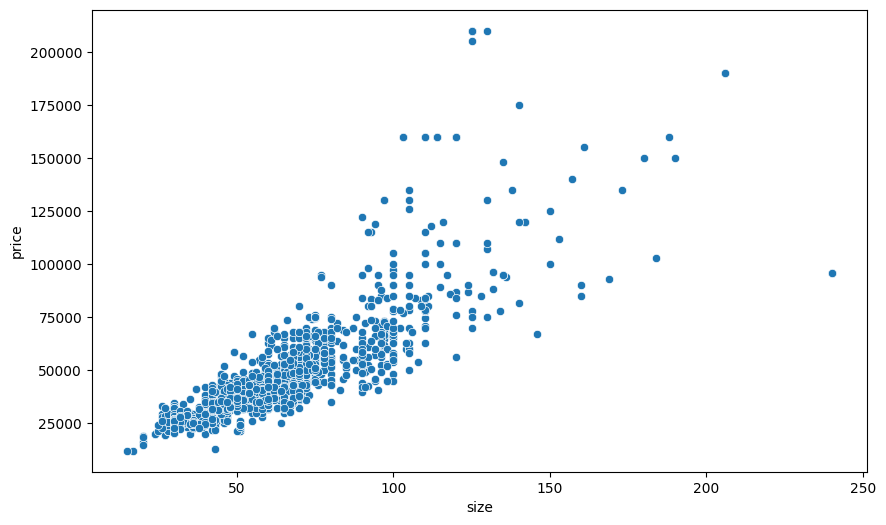

In [57]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x=X, y=y)
plt.show()

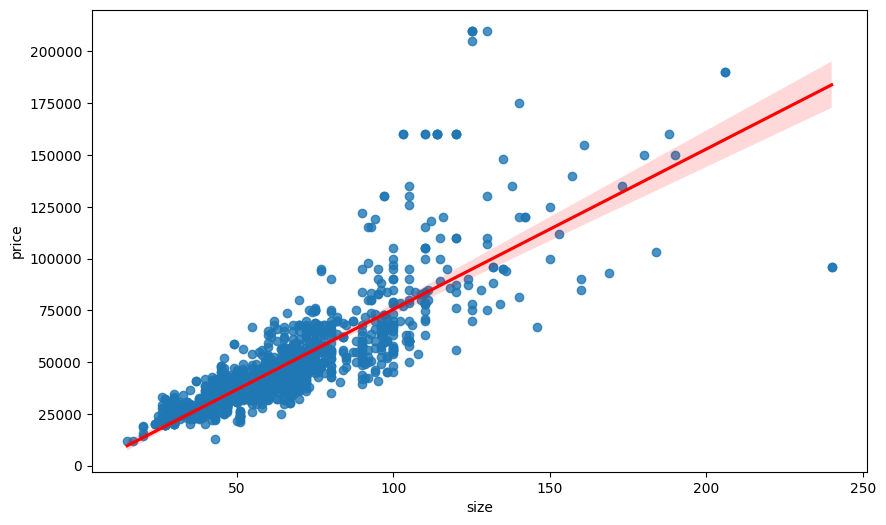

In [58]:
plt.figure(figsize=(10,6))
sns.regplot(data=housing, x=X, y=y, line_kws={"color": "red"})
plt.show()

## 1-Vazifa
Sizning vazifangiz yuqoridagi `X` va `y` o'zgaruvchilardan quyidagi formuladan foydalangan xolda $\theta_0$ va $\theta_1$ koeffisientlarni hisoblash.

![Imgur](https://i.imgur.com/zZoXZxI.png)

Bu yerda $\tilde{x}$ - `X` ustun uchun o'rtracha qiymat,  $\tilde{y}$ - `y` ustun uchun o'rtracha qiymat

In [63]:
teta1 = sum((X-X.mean())*(y-y.mean()))/sum((X-X.mean())**2)
teta1

774.4727879083075

In [66]:
teta0 = y.mean()-teta1*X.mean()
teta0

-2000.2032239806213

## 2-Vazifa
`X` dan bir nechta tasodifiy qiymatlarni ajratib oling va ularga mos keluvchi `y` ni yuqoridagi koeffisientlar yordamida hisoblab ko'ring.

![Imgur](https://i.imgur.com/iT5tffj.png)

In [67]:
import numpy as np

In [68]:
def f(x):
  return teta0+teta1*x

In [70]:
x_test = X.sample(10)
x_test

5261     30.0
3005     64.0
6561     62.0
4213     48.0
2612     58.0
1019     40.0
660      42.0
6880    109.0
5592     70.0
122      42.0
Name: size, dtype: float64

In [71]:
y_haq = y[x_test.index]
y_haq

5261    26000.0
3005    42200.0
6561    52500.0
4213    32500.0
2612    47000.0
1019    27000.0
660     37500.0
6880    80000.0
5592    46000.0
122     37000.0
Name: price, dtype: float64

In [72]:
y_bash = x_test.apply(f)
y_bash

5261    21233.980413
3005    47566.055202
6561    46017.109626
4213    35174.490596
2612    42919.218475
1019    28978.708292
660     30527.653868
6880    82417.330658
5592    52212.891930
122     30527.653868
Name: size, dtype: float64

## 3-Vazifa

Hisoblangan va asl qiymtlar o'rtasidagi RMSE (root mean square error), MAE (mean absolute error) hisoblang.

![Imgur](https://i.imgur.com/GJH9CGy.png)

![Imgur](https://i.imgur.com/aXL9iWa.png)

In [76]:
mae = sum(abs(y_haq-y_bash))/len(y_haq)
print(f'{mae=}')

mae=4742.386042710584


In [78]:
rmse = np.sqrt(sum((y_haq-y_bash)**2)/len(y_bash))
print(f'{rmse=}')

rmse=5061.686593533117
